<a href="https://colab.research.google.com/github/HamsaGV/Spatial-Computing/blob/main/checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In this notebook we are calculating the different Model Accuracy

#We are Calculating the Model Accuracy

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as err
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import cross_val_score
cv_k = 5
cv_scoring = 'neg_mean_squared_error'
cv_scoring = 'r2'

Reading and concatenating the 2013 and 2014 data to form 1 dataset

In [ ]:
DS1 = pd.read_csv("/Users/riggy/Coding/CropPredict/first/file1.csv")
DS2 = pd.read_csv("/Users/riggy/Coding/CropPredict/first/file2.csv")
total_data = pd.concat([DS1, DS2],axis=0)

In [ ]:
#Calculating the dataset values and checkign if there's been any lose

In [ ]:
print(DS1.shape)
print(total_data.shape)

(177493, 26)
(360042, 26)


In [ ]:
#We are removing the location based data because the yield for a particular location is always the same

In [ ]:
# First rounding the latitude and longitude
DS1[['Latitude','Longitude']] = data_2013[['Latitude','Longitude']].round(6)
DS2[['Latitude','Longitude']] = data_2014[['Latitude','Longitude']].round(6)

In [ ]:
long_lat_1 = DS1.drop_duplicates(['Latitude','Longitude']).iloc[:,2:4]
long_lat_1 = long_lat_1.reset_index(inplace=False)
long_lat_1.head()

,index,Latitude,Longitude
0,0,46.811686,-118.695237
1,1,46.929839,-118.352109
2,2,47.006888,-118.510160
3,3,47.162342,-118.699677
4,4,47.157512,-118.434056


In [ ]:
yield_list = []
num_diff_yield = []
for i in range(0, len(long_lat_1)):
        yield_list.append(data_2013[(DS1.Latitude == long_lat_1.Latitude[i]) &
                                    (DS1.Longitude == long_lat_1.Longitude[i])].Yield.unique())
        num_diff_yield.append(len(data_2013[(DS1.Latitude == long_lat_1.Latitude[i]) &
                                            (DS1.Longitude == long_lat_1.Longitude[i])].Yield.unique()))

df1 = pd.DataFrame({'Location' : list(zip(long_lat_1.Latitude, long_lat_1.Longitude)), 
                   'Unique_Yields' : yield_list, 'Number_yield': num_diff_yield}, 
                  columns= ['Location','Unique_Yields', 'Number_yield'])

print("Number of coordinates with more than 1 yield value: %.4f " % len(df1[df1.Number_yield > 1]))
print("Total number of coordinates: %.4f" %len(df1))


Number of coordinates with more than 1 yield value: 0.0000 
Total number of coordinates: 1014.0000


In [ ]:
#Now we will work with distinct county's, As different state have the same county's
countynames= DS1.CountyName.unique()
# creating unique yields for each county
Yield_list = []
Num_diff_yields = []
for county in countynames:
    Yield_list.append(DS1[DS1.CountyName == county].Yield.unique())
    Num_diff_yields.append(len(DS1[DS1.CountyName == county].Yield.unique()))
df = pd.DataFrame({'County' : countynames, 'Unique_Yields' : Yield_list, 'Number_yield': Num_diff_yields}, 
                  columns= ['County','Unique_Yields', 'Number_yield'])

print("Number of counties with more than 1 yield value: %.4f " % len(df[df.Number_yield > 1]))
print("Total number of counties: %.4f" %len(df))
print(df.head(20))

Number of counties with more than 1 yield value: 19.0000 
Total number of counties: 150.0000
       County Unique_Yields  Number_yield
0       Adams        [35.7]             1
1     Alfalfa        [14.4]             1
2       Allen        [46.5]             1
3    Anderson        [45.6]             1
4      Archer        [13.1]             1
5   Armstrong        [13.8]             1
6      Asotin        [52.4]             1
7    Atchison        [52.9]             1
8      Bailey        [21.4]             1
9      Barber        [13.3]             1
10     Barton        [27.6]             1
11     Baylor        [16.5]             1
12     Beaver        [14.6]             1
13    Beckham        [14.2]             1
14       Bell        [52.2]             1
15      Bexar        [31.5]             1
16   Big Horn        [52.4]             1
17     Blaine  [38.4, 18.1]             2
18     Bosque        [27.1]             1
19    Bourbon        [47.4]             1


In [ ]:
total_data101 = total_data.drop(['CountyName','State','Latitude','Longitude','Date'],axis=1)

In [ ]:
total_data102 = total_data101.dropna(axis = 0)

Separating the Feature space and target value

In [ ]:
# We are not working towards spliting the dataset into test and train

In [ ]:
cols = list(total_data102.columns)
cols.remove('Yield')

#### Creating a Train and Test split from the data

In [ ]:
train_split, test_split = train_test_split(total_data102, test_size = 0.3)

------------------------------------------------------------------------------

In [ ]:
#Model : Random Forest Regressor

In [ ]:
# instantiating the model
randomforest_model = RandomForestRegressor(n_estimators=50)

In [ ]:
#n_estimators': The number of trees in the forest As the number of trees increases the complexity, 
#time taken to run the model increases but the errors decreases. 
#But with higher number of trees the model can overfit. T
#herefore the number of trees should be optimal i.e to maintain balance between reduced error and overfitting.

In [ ]:
# fitting the model
randomforest_model.fit(X=train_split.loc[:,cols],y=train_split.loc[:,'Yield'])

RandomForestRegressor(n_estimators=50)

In [ ]:
# important features which are needed for this model
imp101 = list(zip(cols,randomforest_model.feature_importances_))
imp101=sorted(imp101,key=lambda x:x[1])

In [ ]:
# Printing the feature importance
print(imp101)

[('precipTypeIsOther', 0.0), ('precipTypeIsSnow', 0.00029340824272295403), ('precipTypeIsRain', 0.0012897371938922232), ('precipAccumulation', 0.003966645752472384), ('precipProbability', 0.007377822157558778), ('precipIntensityMax', 0.013699194447332898), ('precipIntensity', 0.01693950327919506), ('cloudCover', 0.04201483763890287), ('apparentTemperatureMax', 0.047811838200020045), ('visibility', 0.048467311046267496), ('temperatureMin', 0.050000201730736), ('apparentTemperatureMin', 0.060143628526177335), ('temperatureMax', 0.060264495892481604), ('humidity', 0.06792886521629739), ('dewPoint', 0.07757620241794401), ('windSpeed', 0.08812942659803359), ('pressure', 0.10130676114334906), ('windBearing', 0.10217946274212238), ('NDVI', 0.10463337925791398), ('DayInSeason', 0.10597727851658001)]


In [ ]:
prediction1 = randomforest_model.predict(test_split.loc[:,cols])
print(prediction1)

[35.66  15.354 33.808 ... 14.598 40.026 38.522]


In [ ]:
randomforest_model_accuracy = randomforest_model.predict(test_split.loc[:,cols]).max()
print(randomforest_model_accuracy)

75.756


In [ ]:
#Model Evaluation Metrics

#### Mean Square Error

In [ ]:
error1 = err(test_split.loc[:,"Yield"], prediction1)
print( "MSE: %.4f" % error1)

MSE: 32.7517


------------------------------------------------------------------------

In [ ]:
#GrADIENT BOOSTING REGRESSOR

In [ ]:
# Parameters
params = {'n_estimators' :500, 'learning_rate' : 0.4, 'loss' : 'ls',
         'max_depth' : 8}
# instantiating the model
XGboost_model = GradientBoostingRegressor(**params)

In [ ]:
#n_estimate: indicates the number of boosting stages to perform on the data
#learning_rate: learning rate shrinks the contribution of each tree by learning_rate.
#loss: it's used to find the optimal level of boosting stages
#Max_depth: the maximum depth the nodes of the tree can reach.

In [ ]:
# fitting the model
XGboost_model.fit(train_split.loc[:,cols], train_split.loc[:,"Yield"])

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.4, loss='ls', max_depth=8,
                          n_estimators=500)

#### Predictions using the Test set

In [ ]:
pred2 = XGboost_model.predict(test_split.loc[:,cols])
print(pred2)

[37.79307507 15.14229722 33.58833657 ... 17.13770845 41.35348891
 32.89341342]


In [ ]:
XGboost_model_accuracy = XGboost_model.predict(test_split.loc[:,cols]).max()
print(XGboost_model_accuracy)


85.92041528777258


#### Mean Squared error

In [ ]:
error2 = err(test_split.loc[:,'Yield'], pred2)
print( "MSE: %.4f" % error2)

MSE: 46.9774


In [ ]:
# important features 
imp2 = list(zip(cols, XGboost_model.feature_importances_))
imp2 = sorted(imp2,key=lambda x:x[1])
print(imp2)

[('precipTypeIsOther', 0.0), ('precipTypeIsSnow', 3.4827924334450164e-05), ('precipTypeIsRain', 0.0008821610200513871), ('precipAccumulation', 0.003955008750432951), ('precipProbability', 0.004264292468404647), ('precipIntensityMax', 0.01326528981831802), ('precipIntensity', 0.016452973234273947), ('cloudCover', 0.03689291833343363), ('visibility', 0.040220478479778), ('apparentTemperatureMax', 0.04310860354438723), ('temperatureMin', 0.046036236720228434), ('temperatureMax', 0.05527576237009633), ('apparentTemperatureMin', 0.056658064877668425), ('humidity', 0.0649580222543729), ('windSpeed', 0.07709225740377516), ('dewPoint', 0.08453673640505106), ('windBearing', 0.10152533226127572), ('pressure', 0.10231033565154324), ('NDVI', 0.10948425104893109), ('DayInSeason', 0.14304644743364328)]


### Plotting the test and train get deviance vs the boosting iterations

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Deviance')

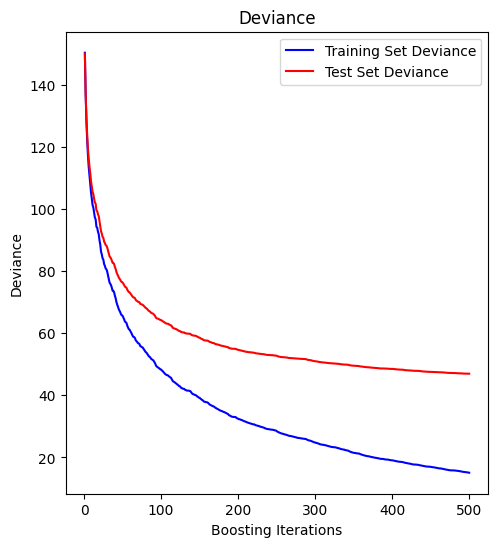

In [ ]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(XGboost_model.staged_predict(test_split.loc[:,cols])):
    test_score[i] = XGboost_model.loss_(test_split.loc[:,"Yield"], y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, XGboost_model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


-----------------------------------------------------------------------

#### Model 4: K Nearest Neighbors

In [ ]:
# instantiating the model
knn_model = KNeighborsRegressor(n_neighbors= 10)

In [ ]:
# Using the nearest neighbor as 10,as this values return the promising Accuracy

In [ ]:
# fitting the model
knn_model.fit(train_split.loc[:,cols], train_split.loc[:,"Yield"])

KNeighborsRegressor(n_neighbors=10)

#### Predicting on the Test split

In [ ]:
pred4 = knn_model.predict(test_split.loc[:,cols])
print(pred4.max())

73.2


In [ ]:
regression_model=LinearRegression()
regression_model.fit(X=train_split.loc[:,cols],y=train_split.loc[:,'Yield'])
pred4 = regression_model.predict(test_split.loc[:,cols])
print(pred4)


regression_model_Accuracy = regression_model.predict(test_split.loc[:,cols]).max()
print(regression_model_Accuracy)


[32.24915964 32.61415462 34.72547988 ... 31.0642501  29.90749091
 38.5258357 ]
51.94590254554389


In [ ]:
##########

--------------------------------------------------------------